In [ ]:
## download processed data:
#1, downlaod data from: GSE202500
#2, download data from: http://169.228.232.194/~mmallick/o/SCislet.tar.gz

In [7]:
library(ggplot2)
library(RColorBrewer)
library(sm)
library(MASS)

# Correaltion analysis

In [1]:
A=read.csv('/oasis/tscc/scratch/gaw006/share/SCislet/primary_ATAC_matrix.csv')
A1=as.matrix(A[,-1])
rownames(A1)=as.character(A$X)
A_data=A1[,c(1:3,6:7,9:10,13:14,16:17,19:23)]
colnames(A_data)=c('alpha_A','beta_A','delta_A','EC_D21','EC_D3239','ENP3_D21','ENP3_D3239','alpha_D21','alpha_D3239','beta_D21','beta_D3239','delta_D21','delta_D3239','alpha_J','beta_J','delta_J')
A_data=A_data[,order(colnames(A_data))]
A_data[1:3,]

,alpha_A,alpha_D21,alpha_D3239,alpha_J,beta_A,beta_D21,beta_D3239,beta_J,delta_A,delta_D21,delta_D3239,delta_J,EC_D21,EC_D3239,ENP3_D21,ENP3_D3239
1:100000016-100000516,33,25,9,2,69,13,7,7,8,2,2,3,16,11,17,4
1:100009954-100010454,97,4,27,11,623,31,47,50,28,2,3,4,15,43,8,13
1:100014450-100014950,72,25,33,11,409,129,52,78,18,5,3,3,62,29,29,15


In [3]:
colnames(A_data)

[1] "alpha_A"     "alpha_D21"   "alpha_D3239" "alpha_J"     "beta_A"     
 [6] "beta_D21"    "beta_D3239"  "beta_J"      "delta_A"     "delta_D21"  
[11] "delta_D3239" "delta_J"     "EC_D21"      "EC_D3239"    "ENP3_D21"   
[16] "ENP3_D3239"

## RNA data

In [4]:
R=read.csv('/oasis/tscc/scratch/gaw006/share/SCislet/primary_snRNA_matrix.csv')
R1=as.matrix(R[,-1])
rownames(R1)=as.character(R$X)
R_data=R1[,c(1:16)]
colnames(R_data)=c('ENP3_D21','EC_D21','alpha_D21','beta_D21','delta_D21','ENP3_D3239','EC_D3239','alpha_D3239','beta_D3239','delta_D3239','alpha_J','alpha_A','beta_J','beta_A','delta_J','delta_A')
R_data=R_data[,order(colnames(R_data))]
R_data[1:3,]

,alpha_A,alpha_D21,alpha_D3239,alpha_J,beta_A,beta_D21,beta_D3239,beta_J,delta_A,delta_D21,delta_D3239,delta_J,EC_D21,EC_D3239,ENP3_D21,ENP3_D3239
5S_rRNA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7SK,4,2,22,4,8,15,18,6,4,0,1,9,94,33,24,5
7SK-1,0,1,10,1,0,1,5,1,1,0,0,0,2,7,1,5


In [5]:
all(colnames(A_data)==colnames(R_data))

[1] TRUE

In [6]:
A_norm=A_data
for (i in 1:dim(A_data)[2]){
    A_norm[,i]=(A_data[,i]/sum(A_data[,i]))*1000000
}
A_norm[1:4,]
exp_peaks<-apply(A_norm,1,function(x) max(x)>1)
A_norm1=A_norm[exp_peaks,]
dim(A_norm1)
peak_count=rownames(A_norm1)

R_norm=R_data
for (i in 1:dim(R_data)[2]){
    R_norm[,i]=(R_data[,i]/sum(R_data[,i]))*1000000
}
R_norm[1:4,]

exp_gene<-apply(R_norm,1,function(x) max(x)>3)
R_norm1<-R_norm[exp_gene,]           
dim(R_norm1)
gene_count=rownames(R_norm1)

,alpha_A,alpha_D21,alpha_D3239,alpha_J,beta_A,beta_D21,beta_D3239,beta_J,delta_A,delta_D21,delta_D3239,delta_J,EC_D21,EC_D3239,ENP3_D21,ENP3_D3239
1:100000016-100000516,0.3387869,0.8506794,0.29215547,0.1645412,0.3912921,0.5079326,0.4369613,0.3180622,0.3516962,0.6713054,0.9426372,0.7198788,0.4404588,0.3543555,0.8824142,0.5138233
1:100009954-100010454,0.9958281,0.1361087,0.87646641,0.9049766,3.5329703,1.2112239,2.9338829,2.2718727,1.2309366,0.6713054,1.4139558,0.9598384,0.4129301,1.3852077,0.4152537,1.6699258
1:100014450-100014950,0.7391714,0.8506794,1.07123672,0.9049766,2.3193979,5.0402544,3.2459981,3.5441215,0.7913164,1.6782635,1.4139558,0.7198788,1.7067778,0.9342098,1.5052948,1.9268375
1:100019312-100019812,0.1539940,0.1020815,0.03246172,0.2468118,0.2211651,0.2344304,0.4993843,0.2271873,0.1758481,2.3495689,0.9426372,0.0000000,0.6056308,0.7731392,0.4152537,0.8991908


[1] 390682     16

,alpha_A,alpha_D21,alpha_D3239,alpha_J,beta_A,beta_D21,beta_D3239,beta_J,delta_A,delta_D21,delta_D3239,delta_J,EC_D21,EC_D3239,ENP3_D21,ENP3_D3239
5S_rRNA,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000,0.000000,0.000000,0.00000000,0.0000000,0.0000000,0.0000000
7SK,2.023998,0.3549769,0.4452561,1.6107203,2.111726,1.37331034,0.6614643,1.4142625,1.6107203,0.00000,0.492988,7.708218,3.22075526,1.0205370,5.0119075,0.2294101
7SK-1,0.000000,0.1774885,0.2023891,0.4026801,0.000000,0.09155402,0.1837401,0.2357104,0.4026801,0.00000,0.000000,0.000000,0.06852671,0.2164775,0.2088295,0.2294101
7SK-2,13.661983,74.3676663,45.5577943,11.2750422,10.822597,70.13038117,49.9038029,9.6641268,11.2750422,79.16321,59.651546,9.421156,61.36566670,74.5919754,64.7371380,55.7925259


[1] 18568    16

In [7]:
# correlation
## 1, proximal cCREs and target genes
#PG=read.table('/oasis/tscc/scratch/gaw006/share/SCislet/extend_50kb_endo_TSS_1kb.bed')

## 1, distal cCREs and target genes
#PG=read.table('/oasis/tscc/scratch/gaw006/share/SCislet/all_EP_cicero_EP_final_2kb.bed')

## 1, promoter cCREs and target genes
PG=read.table('/oasis/tscc/scratch/gaw006/share/SCislet/endo_peak_peak_TSS_1kb.bed')
dim(PG)
PG[1:3,]

[1] 104218      6

V1,V2,V3,V4,V5,V6
chr3,186648365,186648865,3:186648365-186648865,3:186647774-186648774,ST6GAL1
chr3,186648365,186648865,3:186648365-186648865,3:186647791-186648791,ST6GAL1
chr3,186648365,186648865,3:186648365-186648865,3:186647815-186648815,ST6GAL1


In [9]:
keep=(!duplicated(PG[,c(4,6)]))
PG=PG[keep,]
dim(PG)
PG[1:4,]

peak_PG=unique(as.character(PG$V4))
gene_PG=unique(as.character(PG$V6))
length(peak_PG)
length(gene_PG)

length(peak_count)
length(gene_count)

peak_use=intersect(peak_PG,peak_count)
gene_use=intersect(gene_PG,gene_count)

length(peak_use)
length(gene_use)

A_use=A_norm1[(rownames(A_norm1) %in% peak_use),]
R_use=R_norm1[(rownames(R_norm1) %in% gene_use),]
dim(A_use)
dim(R_use)

PG=PG[(PG$V4 %in% peak_use) & (PG$V6 %in% gene_use),]
dim(PG)

[1] 37701     6

,V1,V2,V3,V4,V5,V6
1,chr3,186648365,186648865,3:186648365-186648865,3:186647774-186648774,ST6GAL1
10,chr10,17271797,17272297,10:17271797-17272297,10:17271503-17272503,VIM
12,chr11,101981499,101981999,11:101981499-101981999,11:101980692-101981692,YAP1
15,chr11,119293646,119294146,11:119293646-119294146,11:119292772-119293772,THY1


[1] 35369

[1] 17012

[1] 390682

[1] 18568

[1] 33818

[1] 13891

[1] 33818    16

[1] 13891    16

[1] 31653     6

In [10]:
### random shuffle
A_use=A_use[,sample(1:16, 16)]
R_use=R_use[,sample(1:16, 16)]

PG_genename=as.character(PG$V6)
PG_genename[1:4]
PG_genename1=PG_genename[sample(1:length(PG_genename), length(PG_genename))]
PG_genename1[1:4]
PG$V6=PG_genename1
PG[1:4,]

[1] "ST6GAL1" "VIM"     "YAP1"    "THY1"

[1] "THRB"   "CEP170" "BCAM"   "SH3D19"

,V1,V2,V3,V4,V5,V6
1,chr3,186648365,186648865,3:186648365-186648865,3:186647774-186648774,THRB
10,chr10,17271797,17272297,10:17271797-17272297,10:17271503-17272503,CEP170
12,chr11,101981499,101981999,11:101981499-101981999,11:101980692-101981692,BCAM
15,chr11,119293646,119294146,11:119293646-119294146,11:119292772-119293772,SH3D19


In [19]:
## correlation:
PG_E=as.character(PG$V4)
PG_gene=as.character(PG$V6)
peak_name=rownames(A_use)
gene_name=rownames(R_use)

C=matrix(0,length(PG_E),3)
colnames(C)=c('pvalue','stat','FDR')
dim(C)

for (i in 1:length(PG_E)){
    temp_peak=(A_use[peak_name==PG_E[i],])
    temp_gene=(R_use[gene_name==PG_gene[i],])
    temp_cor=suppressWarnings(cor.test(temp_peak,temp_gene,method ="spearman"))
    C[i,1]=temp_cor$p.value
    C[i,2]=temp_cor$estimate
}
C[1:5,]

C1=cbind(C,PG_E,PG_gene)
C1[1:2,]

[1] 31653     3

pvalue,stat,FDR
8.375279e-07,0.9124359,0
1.187894e-04,0.8153056,0
5.165099e-01,-0.1751288,0
4.302752e-02,0.5111251,0
4.538696e-06,0.8874318,0


pvalue,stat,FDR,PG_E,PG_gene
8.37527940677033e-07,0.912435861443153,0,3:186648365-186648865,ST6GAL1
0.000118789401029541,0.815305592321785,0,10:17271797-17272297,VIM


In [10]:
#write.csv(C1,'/projects/sanderlab/gaowei/Han/primary_correlation/result/TSSCREs_gene_new.csv')

In [13]:
########cCREs-TF correlation
peak_mtx_use<-read.csv("/oasis/tscc/scratch/gaw006/share/SCislet/peak_mtx_use.csv",row.names = 1)
gene_mtx_use<-read.csv("/oasis/tscc/scratch/gaw006/share/SCislet/gene_mtx_use.csv",row.names = 1)
PTF<-read.csv("/oasis/tscc/scratch/gaw006/share/SCislet/peak_TF_matrix.csv",row.names = 1)
dim(PTF)

keep1 = (PTF$peaks %in% rownames(peak_mtx_use))
keep2 = (PTF$TF_genes %in% rownames(gene_mtx_use))
PTF = PTF[keep1 & keep2,]
dim(PTF)

PTF_E=as.character(PTF$peaks)
PTF_gene=as.character(PTF$TF_genes)


[1] 22641360        2

[1] 22641360        2

In [14]:
peak_mtx_use[1:4,1:4]
gene_mtx_use[1:3,1:3]


,alpha_A,alpha_D21,alpha_D3239,alpha_J
1:100036489-100036989,0.2463905,1.2590055,0.4869258,0.1645412
1:100102196-100102696,0.1437278,0.3402717,0.2921555,0.2468118
1:10010341-10010841,9.1472456,5.2742121,6.3624969,9.7079303
1:100111732-100112232,1.7042006,12.5900546,12.6925321,2.1390355


,alpha_A,alpha_D21,alpha_D3239
ALX1,0,1.4199077,0.2428670
ALX3,0,1.4199077,0.4857339
ALX4,0,0.1774885,0.3440615


In [3]:
C=matrix(0,length(PTF_E),3)
colnames(C)=c('pvalue','stat','FDR')
dim(C)

for (i in 1:length(PTF_E)){
  temp_peak=as.numeric(peak_mtx_use[rownames(peak_mtx_use)==PTF_E[i],])
  temp_gene=as.numeric(gene_mtx_use[rownames(gene_mtx_use)==PTF_gene[i],])
  temp_cor=suppressWarnings(cor.test(temp_peak,temp_gene,method ="spearman"))
  C[i,1]=temp_cor$p.value
  C[i,2]=temp_cor$estimate
}
C[1:5,]

[1] 22641360        3

pvalue,stat,FDR
0.909540098,0.03090509,0
0.015138527,-0.59455498,0
0.002824810,0.69462859,0
0.534551859,0.16777046,0
0.002662921,-0.69757193,0


In [4]:
C[1:5,]
#C_TF<-as.data.frame(cbind("peak_ID"=PTF_E,"gene"=PTF_gene,C))
#write.csv(C_TF,file = "/projects/sanderlab/gaowei/Han/primary_correlation/result/C_TF_new.csv",quote = F)

pvalue,stat,FDR
0.909540098,0.03090509,0
0.015138527,-0.59455498,0
0.002824810,0.69462859,0
0.534551859,0.16777046,0
0.002662921,-0.69757193,0


# Correlation distribution

Warning message:
“no DISPLAY variable so Tk is not available”Package 'sm', version 2.2-5.6: type help(sm) for summary information


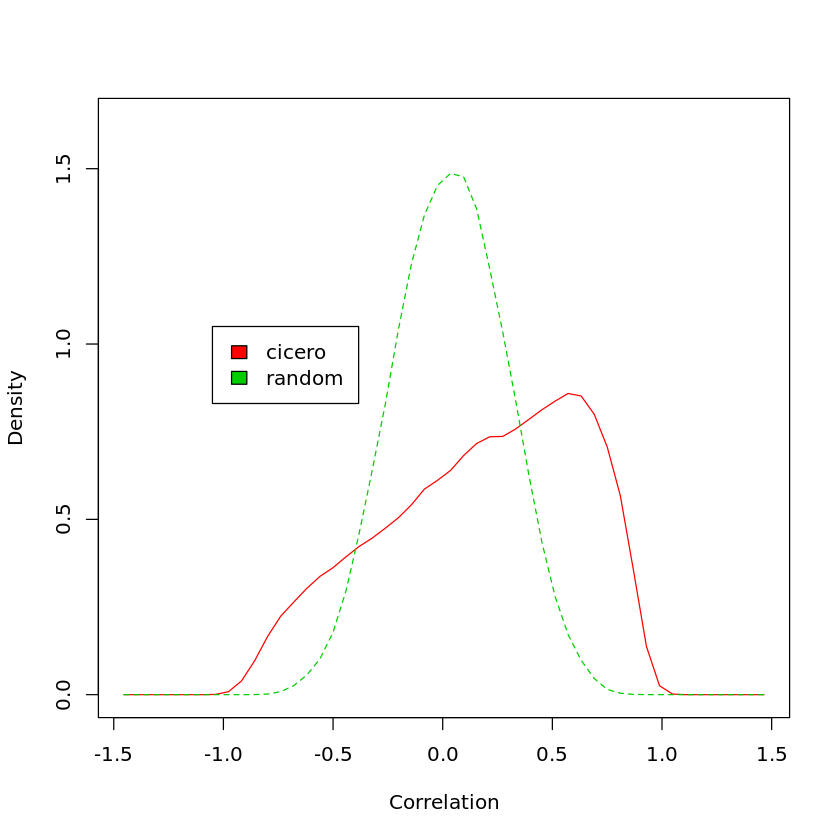

In [3]:
## promoter cCRE-gene
A=read.csv('/oasis/tscc/scratch/gaw006/share/SCislet/TSSCREs_gene_new.csv')
R=read.csv('/oasis/tscc/scratch/gaw006/share/SCislet/TSSCREs_gene_random_new.csv')

c <- factor(c(rep('cicero',length(A$stat)),rep('random',length(A$stat))))
val=c(A$stat,R$stat)
sm.density.compare(val, c,xlab="Correlation", bandwidths=9)

colfill <- c(2:(1+length(levels(c))))
legend(-1.05,1.05,levels(c),fill=colfill)

In [5]:
### FDR 
scc.test<- A$stat
scc.permute<- R$stat
fit.test<-fitdistr(scc.test, "normal") ## normal dist for total events 
fit.permute<-fitdistr(scc.permute, "normal") ## normal dist  for random events

p1 = 1-pnorm(scc.test, mean=fit.test$estimate[1], sd=fit.test$estimate[2]) ## probability of total events with SCC > input scc
p2 = 1-pnorm(scc.test, mean=fit.permute$estimate[1], sd=fit.permute$estimate[2]) ## probability of random events with SCC > input scc
r = p2 / p1 ## FDR = p-random / p-total
A$FDR=r
A[1:3,]


X.1,X,pvalue,stat,FDR,PG_E,PG_gene
1,1,8.375279e-07,0.9124359,0.004428196,3:186648365-186648865,ST6GAL1
2,2,1.187894e-04,0.8153056,0.011597050,10:17271797-17272297,VIM
3,3,5.165099e-01,-0.1751288,1.018290014,11:101981499-101981999,YAP1


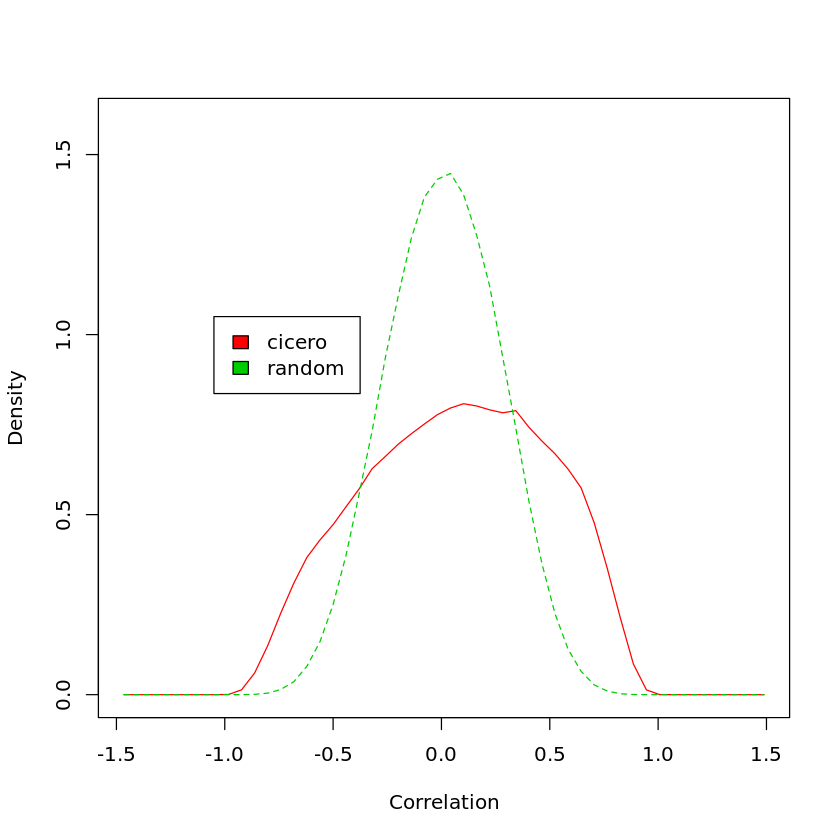

In [8]:
## distal cCRE-gene
A=read.csv('/oasis/tscc/scratch/gaw006/share/SCislet/cicerocCREs_gene_new.csv')
R=read.csv('/oasis/tscc/scratch/gaw006/share/SCislet/cicerocCREs_gene_random_new.csv')

c <- factor(c(rep('cicero',length(A$stat)),rep('random',length(A$stat))))
val=c(A$stat,R$stat)
sm.density.compare(val, c,xlab="Correlation", bandwidths=9)

colfill <- c(2:(1+length(levels(c))))
legend(-1.05,1.05,levels(c),fill=colfill)

In [9]:
### FDR 
scc.test<- A$stat
scc.permute<- R$stat
fit.test<-fitdistr(scc.test, "normal") ## normal dist for total events 
fit.permute<-fitdistr(scc.permute, "normal") ## normal dist  for random events

p1 = 1-pnorm(scc.test, mean=fit.test$estimate[1], sd=fit.test$estimate[2]) ## probability of total events with SCC > input scc
p2 = 1-pnorm(scc.test, mean=fit.permute$estimate[1], sd=fit.permute$estimate[2]) ## probability of random events with SCC > input scc
r = p2 / p1 ## FDR = p-random / p-total
A$FDR=r
A[1:3,]


X.1,X,pvalue,stat,FDR,PG_E,PG_gene
1,1,0.02430914,0.55923488,0.1428555,1:762658-763158,SAMD11
2,2,0.35887252,0.24576901,0.5414431,1:967849-968349,SAMD11
3,3,0.77802214,0.07658321,0.8098361,1:1070708-1071208,SAMD11


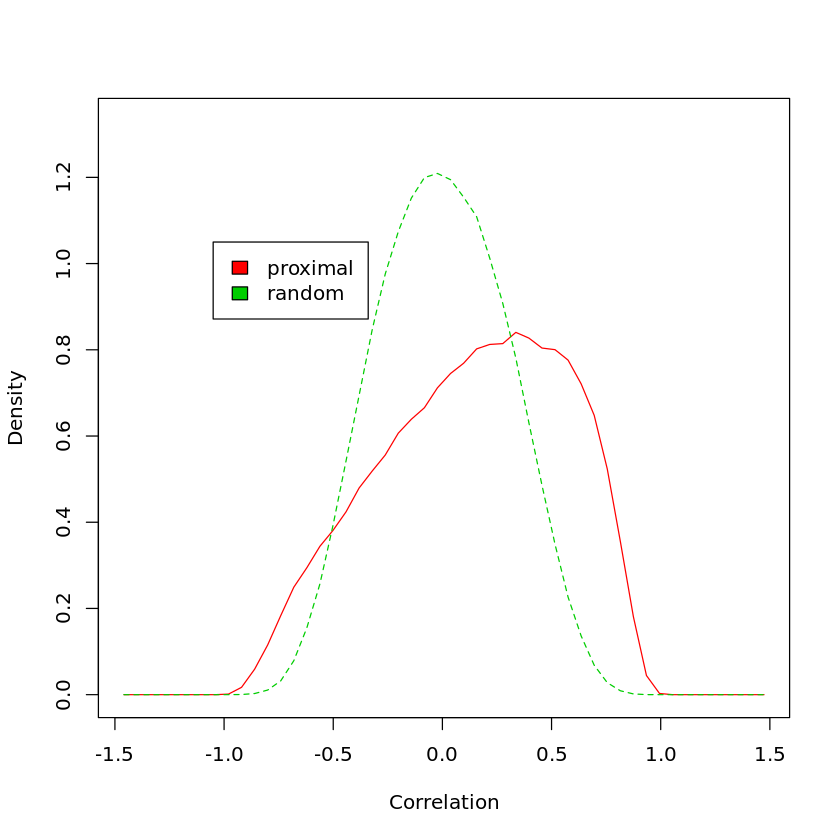

In [10]:
## proximal cCRE-gene
A=read.csv('/oasis/tscc/scratch/gaw006/share/SCislet/proximalcCREs_gene_new.csv')
R=read.csv('/oasis/tscc/scratch/gaw006/share/SCislet/proximalcCREs_gene_random_new.csv')

c <- factor(c(rep('proximal',length(A$stat)),rep('random',length(A$stat))))
val=c(A$stat,R$stat)
sm.density.compare(val, c,xlab="Correlation", bandwidths=9)

colfill <- c(2:(1+length(levels(c))))
legend(-1.05,1.05,levels(c),fill=colfill)

In [11]:
### FDR 
scc.test<- A$stat
scc.permute<- R$stat
fit.test<-fitdistr(scc.test, "normal") ## normal dist for total events 
fit.permute<-fitdistr(scc.permute, "normal") ## normal dist  for random events

p1 = 1-pnorm(scc.test, mean=fit.test$estimate[1], sd=fit.test$estimate[2]) ## probability of total events with SCC > input scc
p2 = 1-pnorm(scc.test, mean=fit.permute$estimate[1], sd=fit.permute$estimate[2]) ## probability of random events with SCC > input scc
r = p2 / p1 ## FDR = p-random / p-total
A$FDR=r
A[1:3,]

X.1,X,pvalue,stat,FDR,PG_E,PG_gene
1,1,0.1099411,0.4150111,0.3078006,11:17859771-17860271,SERGEF
2,2,0.2916065,0.2810891,0.4588003,12:11927155-11927655,ETV6
3,3,0.1609005,-0.3679177,1.0082591,1:22416755-22417255,CDC42


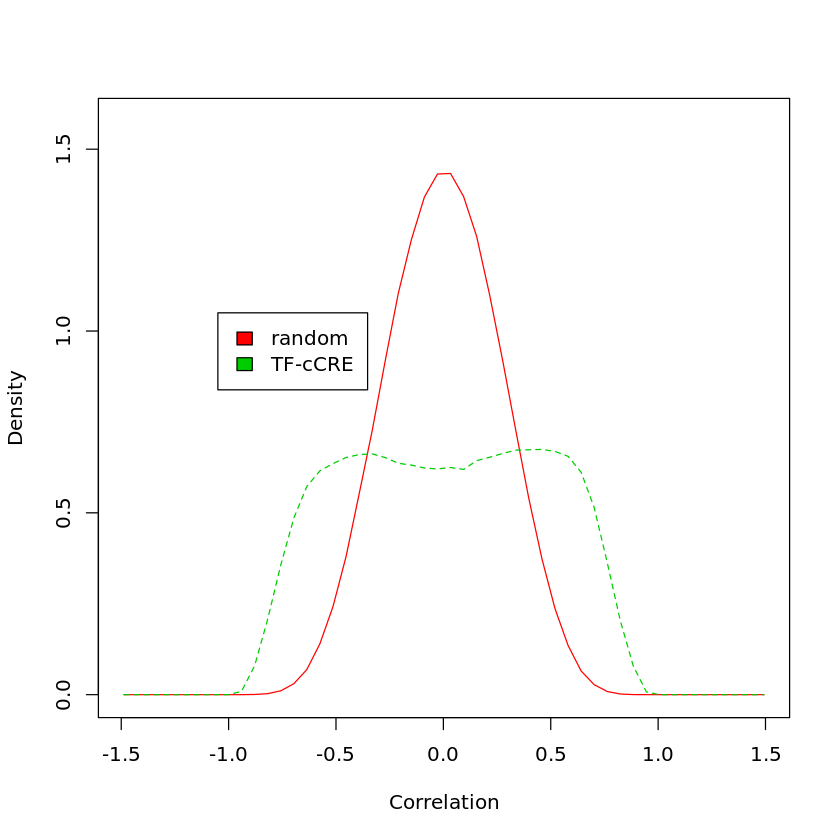

In [14]:
## TF-bindg cCRE  vs TF expression
A=read.csv('/oasis/tscc/scratch/gaw006/share/SCislet/C_TF_new.csv')
R=read.csv('/oasis/tscc/scratch/gaw006/share/SCislet/C_TF_random_new.csv')

c <- factor(c(rep('TF-cCRE',length(A$stat)),rep('random',length(A$stat))))
val=c(A$stat,R$stat)
sm.density.compare(val, c,xlab="Correlation", bandwidths=9)

colfill <- c(2:(1+length(levels(c))))
legend(-1.05,1.05,levels(c),fill=colfill)

In [15]:
### FDR 
scc.test<- A$stat
scc.permute<- R$stat
fit.test<-fitdistr(scc.test, "normal") ## normal dist for total events 
fit.permute<-fitdistr(scc.permute, "normal") ## normal dist  for random events

p1 = 1-pnorm(scc.test, mean=fit.test$estimate[1], sd=fit.test$estimate[2]) ## probability of total events with SCC > input scc
p2 = 1-pnorm(scc.test, mean=fit.permute$estimate[1], sd=fit.permute$estimate[2]) ## probability of random events with SCC > input scc

###positive corr FDR
p1 = 1-pnorm(scc.test, mean=fit.test$estimate[1], sd=fit.test$estimate[2]) ## probability of total events with SCC > input scc
p2 = 1-pnorm(scc.test, mean=fit.permute$estimate[1], sd=fit.permute$estimate[2]) ## probability of random events with SCC > input scc
r1 = p2 / p1 ## FDR = p-random / p-total
A$scc.pos.fdr=r1

###negative corr FDR
p3 = pnorm(scc.test, mean=fit.test$estimate[1], sd=fit.test$estimate[2]) ## probability of total events with SCC > input scc
p4 = pnorm(scc.test, mean=fit.permute$estimate[1], sd=fit.permute$estimate[2]) ## probability of random events with SCC > input scc
r2 = p4 / p3 ## FDR = p-random / p-total
A$scc.neg.fdr=r2
head(A)


X.1,X,peak_ID,gene,pvalue,stat,FDR,scc.pos.fdr,scc.neg.fdr
1,1,18:12009169-12009669,IRF1,0.909540098,0.03090509,0,0.94589867,1.05034020
2,2,18:70535857-70536357,IRF1,0.015138527,-0.59455498,0,1.08863647,0.12290039
3,3,21:45285460-45285960,IRF1,0.002824810,0.69462859,0,0.06100404,1.06662678
4,4,5:161494179-161494679,IRF1,0.534551859,0.16777046,0,0.72129198,1.15996612
5,5,8:23711429-23711929,IRF1,0.002662921,-0.69757193,0,1.05964140,0.06252315
6,6,10:104405037-104405537,IRF1,0.006524479,0.64900680,0,0.08331039,1.07988679
